In [40]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import scipy
import mne
import os

import tqdm
import IPython
import torchvision

import torch.nn as nn
import torch.nn.functional as F

from torchvision import transforms
from torchvision.models import AlexNet
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder

from PIL import Image
from io import BytesIO

In [41]:
import pickle

#reading data
with open('data_for_model.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [42]:
spectra = data['eeg_spectra']
classification = data['classification']

In [43]:
file_list = []
for entry in classification:
    file_list.append(entry[0])

In [44]:
input_data = []
output_data = []
for file in file_list:
    for entry in classification:
        if entry[0] == file:
            output_data.append(entry[1])
    for entry in spectra:
        if entry[0] == file:
            input_data.append(entry[1])
input_output = [input_data, output_data]

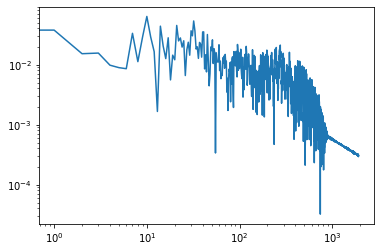

In [45]:
plt.yscale('log')
plt.xscale('log')
plt.plot(input_output[0][0][0])
plt.show()

In [61]:
no_entries,_,_ = np.array(input_output[0]).shape

In [71]:
inputs = []
for spectrograms in input_output[0]:
    inputs.append(torch.tensor(spectrograms))

In [79]:
train_data.data = inputs
train_data.targets = input_output[1]

NameError: name 'train_data' is not defined

In [64]:
data_dic = {}
for i in range(no_entries):
    data_dic.update({input_output[0][i]: input_output[1][i]})

TypeError: unhashable type: 'list'

In [47]:
# @title Import Alexnet
# @markdown This cell gives you the `alexnet` model as well as the `input_image` and `input_batch` variables used below
#import requests, urllib

# original link: https://s3.amazonaws.com/pytorch/models/alexnet-owt-4df8aa71.pth
# state_dict = torch.hub.load_state_dict_from_url("https://osf.io/9dzeu/download")

# alexnet = AlexNet()
# alexnet.load_state_dict(state_dict=state_dict)

# url, filename = ("https://raw.githubusercontent.com/NeuromatchAcademy/course-content-dl/main/tutorials/W2D2_ModernConvnets/static/dog.jpg", "dog.jpg")
# try: urllib.URLopener().retrieve(url, filename)
# except: urllib.request.urlretrieve(url, filename)

# input_image = Image.open(filename)
# preprocess = transforms.Compose([
#                                  transforms.Resize(256),
#                                  transforms.CenterCrop(224),
#                                  transforms.ToTensor(),
#                                  transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                                                       std=[0.229, 0.224, 0.225]),
#                                  ])
# input_tensor = preprocess(input_image)
# input_batch = input_tensor.unsqueeze(0)  # create a mini-batch as expected by the model

# # move the input and model to GPU for speed if available
# if torch.cuda.is_available():
#   input_batch = input_batch.cuda()
#   alexnet.cuda()

Downloading: "https://osf.io/9dzeu/download" to C:\Users\usr1/.cache\torch\hub\checkpoints\download


In [57]:
def set_device():
  device = "cuda" if torch.cuda.is_available() else "cpu"
  if device != "cuda":
    print("WARNING: For this notebook to perform best, "
        "if possible, in the menu under `Runtime` -> "
        "`Change runtime type.`  select `GPU` ")
  else:
    print("GPU is enabled in this notebook.")

  return device

DEVICE = set_device()

GPU is enabled in this notebook.


In [58]:
alexnet = torchvision.models.alexnet(pretrained=True)
#num_ftrs = alexnet.fc.in_features
alexnet.classifier[6] = nn.Linear(4096, 2)
# reset final fully connected layer, number of classes = types of Pokemon = 9
#alexnet.fc = nn.Linear(num_ftrs, 2)
alexnet.to(DEVICE)
optimizer = torch.optim.Adam(alexnet.parameters(), lr=1e-4)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
# @title Finetune ResNet

pretrained_accs = []
for epoch in tqdm.tqdm(range(10)):
  # Train loop
  for batch in :
    images, labels = batch
    images = images.to(DEVICE)
    labels = labels.to(DEVICE)

    optimizer.zero_grad()
    output = resnet(images)
    loss = loss_fn(output, labels)
    loss.backward()
    optimizer.step()

  # Eval loop
  with torch.no_grad():
    loss_sum = 0
    total_correct = 0
    total = len(pokemon_test_set)
    for batch in pokemon_test_loader:
      images, labels = batch
      images = images.to(DEVICE)
      labels = labels.to(DEVICE)
      output = resnet(images)
      loss = loss_fn(output, labels)
      loss_sum += loss.item()

      predictions = torch.argmax(output, dim=1)

      num_correct = torch.sum(predictions == labels)
      total_correct += num_correct

    # Plot accuracy
    pretrained_accs.append(total_correct / total)
    plt.plot(pretrained_accs)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Pokemon prediction accuracy')
    IPython.display.clear_output(wait=True)
    IPython.display.display(plt.gcf())
  plt.close()

In [51]:
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 